**Due Date: Monday, February 26th, 11:59pm**

- Save a copy of the notebook to your Google Drive. You can do that by going to the menu and clicking `File` > `Save` > `SAVE A COPY IN DRIVE`.
- Fill out the missing parts and run the code modules.
- Answer the questions (if any) in a separate document or by adding a new `Text` block inside the Colab.
- Download the solved notebook by going to the menu and clicking `File` > `Download .ipynb`.
- Make sure the downloaded version is showing your solutions.
- Upload your solutions to BruinLearn (under "Colab Assignment #5: Prediction - Classification").

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import metrics

np.random.seed(0)

We are going to work with a dataset of credit card defaults in Taiwan. You can check the original dataset [here](https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients). We download a cleaned and slightly modified version of this dataset to use here.


In [12]:
!wget -O credit_card_defaults_clean.csv https://www.dropbox.com/s/xy1jbcrfbj8lqps/credit_card_default_clean.csv?dl=0

--2024-02-26 04:24:50--  https://www.dropbox.com/s/xy1jbcrfbj8lqps/credit_card_default_clean.csv?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.3.18, 2620:100:6018:18::a27d:312
Connecting to www.dropbox.com (www.dropbox.com)|162.125.3.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/xy1jbcrfbj8lqps/credit_card_default_clean.csv [following]
--2024-02-26 04:24:51--  https://www.dropbox.com/s/raw/xy1jbcrfbj8lqps/credit_card_default_clean.csv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc03bbe1006e9d1e77bbfb148f81.dl.dropboxusercontent.com/cd/0/inline/CN9n8W6_lj7IFeOYwoZ-UAo-IpFz8Nu_4yYBOiCXcQp9RbGl3C4uXTR_8f3H3hwUO2y__3J_lUKfzOa_xOY4U3r49AJXairt1RC0cqbLhT87IpOSZENhMykINxP9anCYEAg/file# [following]
--2024-02-26 04:24:51--  https://uc03bbe1006e9d1e77bbfb148f81.dl.dropboxusercontent.com/cd/0/inline/CN9n8W6_lj7IFeOYwoZ-UAo-IpFz8Nu_4yYBOiCXcQp9RbGl3C4uXTR_8f3H3hwUO2y

Load the data.

In [13]:
default_data = pd.read_csv("./credit_card_defaults_clean.csv")

print("The first three rows of the data are:")
default_data.head(3)

The first three rows of the data are:


,limit_bal,sex,education,marriage,age,last_payment,last_balance,default
0,20000,female,university,married,24,0,3913,1
1,120000,female,university,single,26,0,2682,1
2,90000,female,university,single,34,1518,29239,0


We are going to use this dataset to predict the probability of default for a credit card customer based on the features in our data.

## Preprocessing data

Separate features and label into two different variables.

In [14]:
# TODO: Assign the right values to X and y
default_data = pd.get_dummies(
    default_data,
    columns = ["sex", "education", "marriage"],
    drop_first = True
)

X = default_data.drop("default", axis = 1)
y = default_data.default
# END OF TODO

print("shape of X is: ", X.shape)
print("shape of y is: ", y.shape)

shape of X is:  (29601, 10)
shape of y is:  (29601,)


Convert categorical features to 0-1 indicator variables.

In [18]:
# TODO: Update X
X = default_data.drop("default", axis = 1)
# END OF TODO

print("The first three rows for the features are:")
X.head(3)

The first three rows for the features are:


,limit_bal,age,last_payment,last_balance,sex_male,education_high school,education_others,education_university,marriage_others,marriage_single
0,20000,24,0,3913,0,0,0,1,0,0
1,120000,26,0,2682,0,0,0,1,0,1
2,90000,34,1518,29239,0,0,0,1,0,1


Divide the data into train-validation-test datasets using 80%-10%-10% split.

In [19]:
# TODO: Assign the right values to X_train, X_val, X_test, y_train, y_val, y_test
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5)

# X_train = X
# X_val = X
# X_test = X
# y_train = y
# y_val = y
# y_test = y
# END OF TODO

print("shape of X_train is: ", X_train.shape)
print("shape of X_val is: ", X_val.shape)
print("shape of X_test is: ", X_test.shape)

shape of X_train is:  (23680, 10)
shape of X_val is:  (2960, 10)
shape of X_test is:  (2961, 10)


##Logistic Regression (Linear Model)

Use the logistic regression to develop a model for predicting default on credit card loan based on the observed data.

In [20]:
# TODO: Fit a logistic regression model with L-1 regularization to the data
#       Use 1.0 for the regularization parameter (C = 1.0)
from sklearn.linear_model import LogisticRegression
model_lr = LogisticRegression(solver = 'liblinear',
                              penalty = 'l1',
                              C = 1.0)
model_lr.fit(X_train, y_train)
# END OF TODO

preds_train = model_lr.predict(X_train)
preds_val = model_lr.predict(X_val)
print("First four 0-1 predictions for the validation set:")
print(preds_val[0:4])

probs_train = model_lr.predict_proba(X_train)[:, 1]
probs_val = model_lr.predict_proba(X_val)[:, 1]
print("First four predicted probabilities for positive label in the validation set:")
print(probs_val[0:4])

First four 0-1 predictions for the validation set:
[0 0 0 0]
First four predicted probabilities for positive label in the validation set:
[0.18076835 0.0908968  0.2008445  0.07364089]


Let's look at the coefficients in the logistic regression model:

In [21]:
print("intercept: ", model_lr.intercept_[0])
for feature, coef in zip(X_train.columns, model_lr.coef_[0]):
    print(feature, ":", coef)

intercept:  -0.7231926185121389
limit_bal : -3.311349067465324e-06
age : 0.002057657360114029
last_payment : -2.650785200960953e-05
last_balance : 1.5396520077614916e-06
sex_male : 0.16481287475119066
education_high school : 0.009956462069655479
education_others : -1.1478876437602845
education_university : 0.015991725888227056
marriage_others : -0.06323297076212933
marriage_single : -0.21903936336391452


How can you interpret the value of the coefficient for `last_payment`?

Let's check the confusion matrix in the training data if we use 0-1 predictions from the model (using 0.5 as the probability threshold):

In [22]:
confusion_matrix_train = metrics.confusion_matrix(y_train, preds_train)
print("Confusion matrix for the training set:")
print(confusion_matrix_train)

Confusion matrix for the training set:
[[18342     0]
 [ 5338     0]]


What are the values in each cell in this confusion matrix correspond to? Based on this confusion matrix, do you think these predictions from the model are useful at all?

Now, let's use 0.2 as the probability threshold, assign positive prediction if the prediction probability was > 0.2, and compute the confusion matrix again.

In [23]:
confusion_matrix_train = metrics.confusion_matrix(y_train, probs_train > 0.2)
print("Confusion matrix for the training set:")
print(confusion_matrix_train)

Confusion matrix for the training set:
[[ 7248 11094]
 [ 1143  4195]]


What is the number of false positives in the training set for this model?

To measure the performance of the model independent of the probability threshold, let' look at the AUC of the model in the training and validation sets:

In [24]:
fpr, tpr, thresholds = metrics.roc_curve(y_train, probs_train)
auc_train = metrics.auc(fpr, tpr)
print("AUC of the model in the training set is: ", auc_train)

fpr, tpr, thresholds = metrics.roc_curve(y_val, probs_val)
auc_val = metrics.auc(fpr, tpr)
print("AUC of the model in the validation set is: ", auc_val)

AUC of the model in the training set is:  0.6385343986099178
AUC of the model in the validation set is:  0.6254533418156509


Based on these metrics, do you see any overfitting to the training data in this model?

## Decision Tree (Non-linear Model)

This time, let's apply a decision tree model to the classification problem.

In [25]:
# TODO: Fit a decision tree to the data
#       Use cross-entropy for the split
#       Use 3 as the maximum depth of the tree
#       Use 100 as minimum number of samples for a split at a node
#       Don't forget to set the random_state to 0.
from sklearn import tree

model_dt = tree.DecisionTreeClassifier(
    criterion="entropy",
    min_samples_split = 100,
    max_depth = 3,
    random_state = 0
)
model_dt.fit(X_train, y_train)
# END OF TODO

preds_train = model_dt.predict(X_train)
preds_val = model_dt.predict(X_val)
print("First four 0-1 predictions for the validation set:")
print(preds_val[0:4])

probs_train = model_dt.predict_proba(X_train)[:, 1]
probs_val = model_dt.predict_proba(X_val)[:, 1]
print("First four predicted probabilities for positive label in the validation set:")
print(probs_val[0:4])

First four 0-1 predictions for the validation set:
[0 0 0 0]
First four predicted probabilities for positive label in the validation set:
[0.27174472 0.27174472 0.11384181 0.27174472]


Let's draw the tree to see what is happening inside the fitted model.

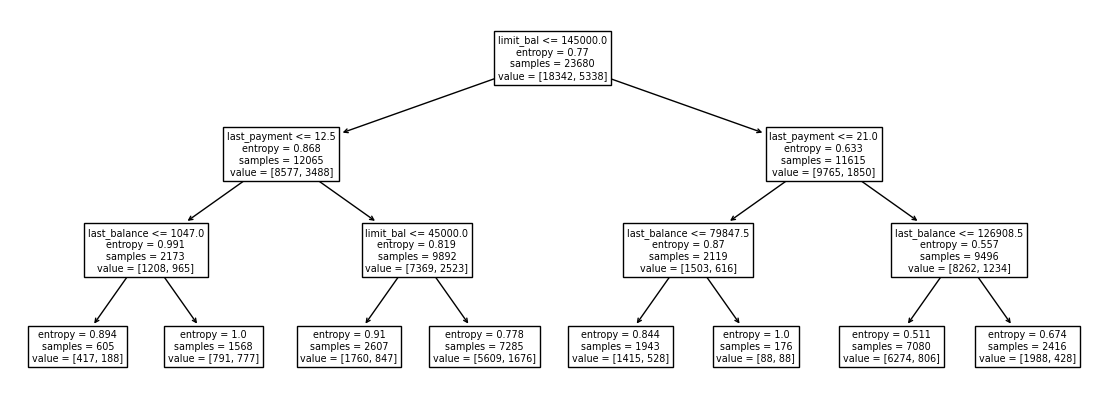

In [26]:
plt.rcParams['figure.figsize'] = [14, 5]
tree.plot_tree(model_dt,
               feature_names=X_train.columns)
plt.show()

Based on the diagram, which feature is splitted at the root of the tree?

Next, let's compute the AUC of this model.

In [27]:
# TODO: Assign the correct values to auc_train and auc_val

fpr, tpr, thresholds = metrics.roc_curve(y_train, probs_train)
auc_train = metrics.auc(fpr, tpr)

fpr, tpr, thresholds = metrics.roc_curve(y_val, probs_val)
auc_val = metrics.auc(fpr, tpr)

# END OF TODO

print("AUC of the model in the training set is: ", auc_train)
print("AUC of the model in the validation set is: ", auc_val)

AUC of the model in the training set is:  0.6570252164047332
AUC of the model in the validation set is:  0.649479098699378


Is this model performing better in the prediction task over the validation set compared to logistic regression?

##Out-of-sample Validation

Finally, let's estimate the prediction error of the best model for new data by using the test set.

In [28]:
# TODO: Assign the correct values to auc_test
preds_test = model_dt.predict(X_test)
pred_prob_test = model_dt.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = metrics.roc_curve(y_test, pred_prob_test, pos_label = 1)
auc_test = metrics.auc(fpr, tpr)
# END OF TODO

print("AUC of the model in the test set is: ", auc_test)

AUC of the model in the test set is:  0.6335200844950271


Apply the following code to draw the ROC curve for the model in the test set.

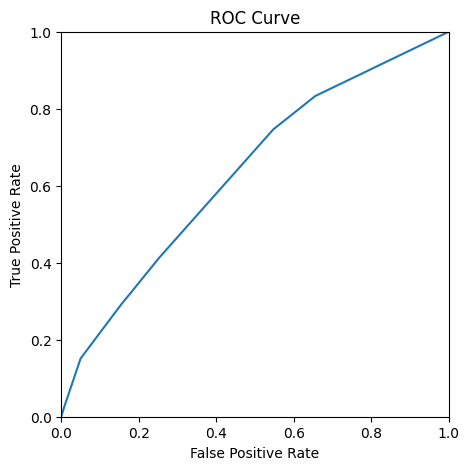

In [29]:
plt.rcParams['figure.figsize'] = [5, 5]
plt.figure()
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()